In [1]:
using PlotlyJS
using LinearAlgebra
using Printf

In [6]:
λ = 2
xn = 10

10

In [1]:
f(x)=3*x

f (generic function with 1 method)

In [3]:
f(100)

300

In [7]:
di = fill(-λ,xn-1)
d  = fill(1+2*λ,xn)
ds = fill(-λ,xn-1)
A  = Tridiagonal(di, d, ds)  

10×10 Tridiagonal{Int64, Vector{Int64}}:
  5  -2   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅
 -2   5  -2   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅
  ⋅  -2   5  -2   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅
  ⋅   ⋅  -2   5  -2   ⋅   ⋅   ⋅   ⋅   ⋅
  ⋅   ⋅   ⋅  -2   5  -2   ⋅   ⋅   ⋅   ⋅
  ⋅   ⋅   ⋅   ⋅  -2   5  -2   ⋅   ⋅   ⋅
  ⋅   ⋅   ⋅   ⋅   ⋅  -2   5  -2   ⋅   ⋅
  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅  -2   5  -2   ⋅
  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅  -2   5  -2
  ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅   ⋅  -2   5

In [11]:
function lu_descomposition(A)
    
    n = length(A[1,:])
    L = zeros(n,n)
    U = zeros(n,n)

    
    L[1,1] = A[1,1]
    U[1,1] = 1
    U[1,2] = A[1,2]/L[1,1]

    for i in 2:n

        if i <n
            U[i,i] = 1
            L[i,i-1] = A[i-1,i]
            L[i,i] = A[i,i] - L[i,i-1]*U[i-1,i]
            U[i,i+1] =A[i,i+1]/L[i,i]
        end

        if i==n
            U[i,i] = 1
            L[i,i-1] = A[i-1,i]
            L[i,i] = A[i,i] - L[i,i-1]*U[i-1,i]
        end

    end
    
    return L, U
end

lu_descomposition (generic function with 2 methods)

In [13]:
L,U = lu_descomposition(A)
L*U

10×10 Matrix{Float64}:
  5.0  -2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
 -2.0   5.0  -2.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0  -2.0   5.0  -2.0   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0  -2.0   5.0  -2.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0  -2.0   5.0  -2.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0  -2.0   5.0  -2.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  -2.0   5.0  -2.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0  -2.0   5.0  -2.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0  -2.0   5.0  -2.0
  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -2.0   5.0

$$Ax=b$$
$$LUx=b$$

Haciendo

$$UX=z \dots (1)$$

Tenemos
$$LZ=b \dots (2)$$

Resolviendo $(2)$ para encontrar $Z$ 

$$
\begin{bmatrix}
    l_{1,1} & 0       & 0       & \dots       \\
    l_{2,1} & l_{2,2} & 0       & \dots       \\
    0      & l_{3,2} & l_{3,3} & \dots       \\
    \vdots & \vdots  & \ddots  & \vdots   \\
    0      & 0       & l_{n,n-1} & l_{n,n} \\
\end{bmatrix}
\begin{pmatrix}
    z_{1} \\
    z_{2} \\
    \vdots \\
    z_{n} \\
\end{pmatrix}
=
\begin{pmatrix}
    b_{1} \\
    b_{2} \\
    \vdots \\
    b_{n} \\
\end{pmatrix}
$$

De manera que

$$l_{1,1}Z_{1}=b_{1} \Rightarrow z_{1}=\frac{b_{1}} {l_{1,1}} $$

$$l_{2,1}z_{1} +l_{2,2}z_{2} = b_{2} \Rightarrow z_{2} =\frac{b_{2}}{l_{2,2}} - \frac{l_{2,1}z_{1}}{l_{2,2}}  $$

$$l_{3,2}z_{2} +l_{3,3}z_{3} = b_{3} \Rightarrow z_{3} =\frac{b_{3}}{l_{3,3}} - \frac{l_{3,2}z_{2}}{l_{3,3}}  $$

$$l_{i,i-1}z_{i-1} +l_{i,i}z_{i} = b_{i} \Rightarrow z_{i} =\frac{b_{i}}{l_{i,i}} - \frac{l_{i,i-1}z_{i-1}}{l_{i,i}}, i=2,3 \dots n $$



reemplazando en $(1)$ podemos encontrar $X$

$$
\begin{bmatrix}
    1      & u_{1,2} & 0        & \dots       \\
    0      & 1       & u_{2,3}  & \dots       \\
    0      & 0       & 1        & \dots       \\
    \vdots & \vdots  & \ddots   & u_{n-1,n}   \\
    0      & 0       & 0        & 1 \\
\end{bmatrix}
\begin{pmatrix}
    x_{1} \\
    x_{2} \\
     \vdots \\
    x_{n} \\
\end{pmatrix}
=
\begin{pmatrix}
    z_{1} \\
    z_{2} \\
     \vdots \\
    z_{n} \\
\end{pmatrix}
$$

$$x_{n} = z_{n}$$
$$ x_{n-1} + u_{n-1,n}x_{n} = z_{n-1} \Rightarrow x_{n-1} = z_{n-1} -u_{n-1,n}x_{n} $$
$$ x_{i-1} + u_{i-1,i}x_{i} = z_{i-1} \Rightarrow x_{i-1} = z_{i-1} -u_{i-1,i}x_{i} , i= n,n-1 \dots 2$$

In [14]:
function crow_method(A,b)
    
    n = length(b)
    L,U = lu_descomposition(A)
    
    z = zeros(n)
    z[1] = b[1]/L[1,1]

    for i in 2:n
        z[i] = b[i]/L[i,i] - L[i,i-1]*z[i-1]/L[i,i]
    end

    x = zeros(n)
    x[n] = z[n]

    for i in n:-1:2
        x[i-1] = z[i-1] - U[i-1,i]*x[i]
    end

    return x

end

crow_method (generic function with 2 methods)

In [2]:
include("utils/functions.jl")

crow_method (generic function with 1 method)

In [16]:
a,b = 0,1
t_min, t_max = 0,0.5

ci = x -> sin.(π*x)

xn = 10
tn  = 1000

h = (b-a)/xn
k = (t_max-t_min)/tn 
α = 1

λ = k*α^2/h^2

di = fill(-λ,xn-2)
d  = fill(1+2*λ,xn-1)
ds = fill(-λ,xn-2)
A  = Tridiagonal(di, d, ds)  

S = zeros(tn+1,xn+1)
S[:,1] = zeros(tn+1)
S[:,xn+1] = zeros(tn+1)
S[1,2:xn] = ci(LinRange(a+h, b-h, xn-1))
S

for i in 2:tn+1
    #S[i,2:xn] = A\S[i-1,2:xn]
    S[i,2:xn] = crow_method(A,S[i-1,2:xn])
end
S[tn+1,:]

11-element Vector{Float64}:
 0.0
 0.002341955555797864
 0.004454664184430394
 0.006131319245220464
 0.00720779805887523
 0.007578727378845219
 0.007207798058875234
 0.006131319245220494
 0.004454664184430424
 0.0023419555557978823
 0.0

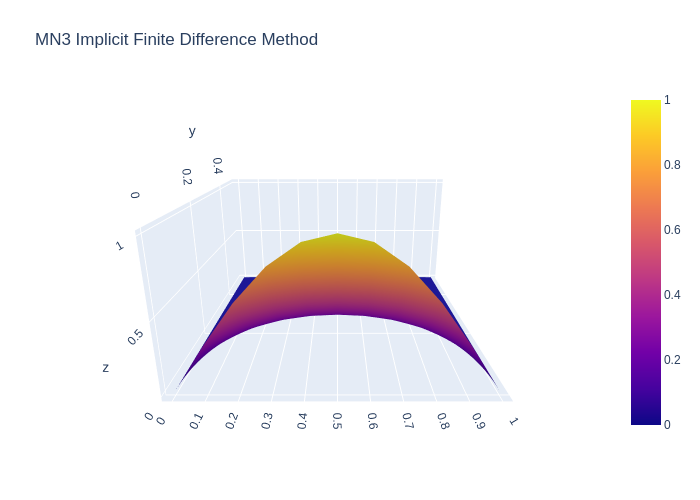

In [17]:
x = LinRange(a, b, xn+1)
y = LinRange(t_min, t_max, tn+1)
Z = vector_de_vectores = [vec(S[i, :]) for i in 1:size(S, 1)]
layout = Layout(
    title="MN3 Implicit Finite Difference Method",
    autosize=false,
    width=800,
    height=400,
    margin=attr(l=65, r=50, b=65, t=90),
    scene=attr(
            xaxis_nticks=20,
            zaxis_nticks=4,
            camera_eye=attr(x=0, y=-1.5, z=0.5),
            aspectratio=attr(x=1, y=1, z=0.5)
        )
)
Plot(surface(x=x, y=y, z=Z), layout)